# The Effect of the Potential Recession on the Real Economy
### Exploratory Data Analysis of Layoffs Data

As global inflation spiralled out of control in 2022, central bankers around the world undertook harsh measures to curtail inflation in their economies. As fears of an incoming recession increases, businesses have been responding to the likelihood of reduced capital access by laying off workers.

Technology companies have been severely affected by this layoff trend. We will review the layoff data from technology companies and determining which companies and industries have been most affected by layoffs.

Relevant columns in the dataset are:
* Company - Name of the Company
* Location - Location of the Company
* Industry - Industry of the Company
* Laid_Off_Count - Number of employees laid off
* Percentage - Percentage of employees laid off
* Date - Date of layoff
* Stage - Funding stage
* Funds_Raised - Funds raised by the Company (in $Millions)

In [88]:
import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

In [89]:
layoffs = pd.read_csv('layoffs_data.csv')
layoffs.head()

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Doma,SF Bay Area,Finance,515.0,0.400,2022-12-06,https://investor.doma.com/node/8161/html,679.0,IPO,2022-12-07 06:21:36,United States,Unknown
1,BuzzFeed,New York City,Media,180.0,0.120,2022-12-06,https://variety.com/2022/digital/news/buzzfeed...,696.0,IPO,2022-12-06 18:40:43,United States,Unknown
2,Weedmaps,Los Angeles,Other,175.0,0.250,2022-12-06,https://www.businessinsider.com/weedmaps-canna...,NaN,Acquired,2022-12-07 06:29:37,United States,Unknown
3,Adobe,SF Bay Area,Marketing,100.0,NaN,2022-12-06,https://www.bloomberg.com/news/articles/2022-1...,2.0,IPO,2022-12-07 06:30:37,United States,Unknown
4,Chipper Cash,SF Bay Area,Finance,50.0,0.125,2022-12-06,https://techcrunch.com/2022/12/06/african-fint...,302.0,Series C,2022-12-07 02:37:02,United States,Unknown


### Cleaning the Dataset

In [90]:
# Clean the date column
layoffs['Date'] = pd.to_datetime(layoffs['Date'])
layoffs['Date_Added'] = pd.to_datetime(layoffs['Date_Added'])

In [91]:
layoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Company                     1748 non-null   object        
 1   Location                    1748 non-null   object        
 2   Industry                    1748 non-null   object        
 3   Laid_Off_Count              1229 non-null   float64       
 4   Percentage                  1173 non-null   float64       
 5   Date                        1747 non-null   datetime64[ns]
 6   Source                      1748 non-null   object        
 7   Funds_Raised                1618 non-null   float64       
 8   Stage                       1748 non-null   object        
 9   Date_Added                  1748 non-null   datetime64[ns]
 10  Country                     1748 non-null   object        
 11  List_of_Employees_Laid_Off  1748 non-null   object      

In [92]:
# Check for null values
layoffs.isnull().sum()

Company                         0
Location                        0
Industry                        0
Laid_Off_Count                519
Percentage                    575
Date                            1
Source                          0
Funds_Raised                  130
Stage                           0
Date_Added                      0
Country                         0
List_of_Employees_Laid_Off      0
dtype: int64

There are a number of missing values in the dataset which will be removed later during correlation analysis.

In [93]:
# General statistical overview
layoffs.describe(include='all')

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
count,1748,1748,1748,1229.000000,1173.000000,1747,1748,1618.000000,1748,1748,1748,1748
unique,1462,162,28,NaN,NaN,406,1575,NaN,15,1709,55,85
top,Uber,SF Bay Area,Finance,NaN,NaN,2020-04-02 00:00:00,Internal memo,NaN,Unknown,2020-03-28 20:52:49,United States,Unknown
freq,5,467,218,NaN,NaN,27,74,NaN,307,40,1150,1663
first,NaN,NaN,NaN,NaN,NaN,2020-03-11 00:00:00,NaN,NaN,NaN,2020-03-28 20:52:49,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-12-06 00:00:00,NaN,NaN,NaN,2022-12-07 06:37:12,NaN,NaN
mean,NaN,NaN,NaN,196.707079,0.276021,NaN,NaN,866.427253,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,567.308152,0.266446,NaN,NaN,6365.616594,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,31.000000,0.100000,NaN,NaN,44.250000,NaN,NaN,NaN,NaN


### Statistical Analysis

We will conduct statistical analysis on the dataset to determine answers to the following questions:
1. How many companies per industry with layoffs?
2. Which locations have the highest layoffs?
3. Is there a correlation between location and layoffs?
4. Is there a correlation between funds raised and percentage of laid off staff?
5. Which funding round/ stage has the highest layoffs?
6. Which companies have the highest and lowest number of laid off employees?
7. Which companies have the highest and lowest percentage of laid off employees?

### Industry, Companies & Locations with the Highest Layoffs

In [96]:
# Select Top 20 Industries with layoffs
top20_ind = layoffs.groupby('Industry').agg({'Company': np.count_nonzero}).sort_values(by='Company', ascending=False).reset_index()[:20]
top20_ind = top20_ind.sort_values('Company')
top20_ind

,Industry,Company
19,Fitness,27
18,Recruiting,28
17,Infrastructure,34
16,Logistics,34
15,HR,44
14,Security,50
13,Data,60
12,Travel,62
11,Crypto,65
10,Education,74


<AxesSubplot: title={'center': 'Top 20 Industries with Highest Layoffs'}, xlabel='Number of Companies Laying off Staff', ylabel='Location'>

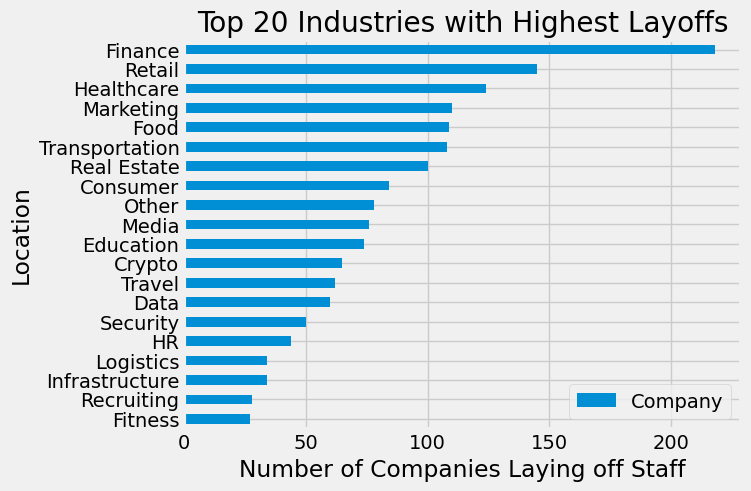

In [97]:
# Plot the Top 20 Industries with the Highest Layoffs
top20_ind.plot.barh('Industry', ylabel='Location', xlabel='Number of Companies Laying off Staff',
                                           title='Top 20 Industries with Highest Layoffs')

The industry with the highest number of laid off employees is fintech.

In [99]:
# Select Top 20 locations that have the highest layoffs
top20_loc = layoffs.groupby('Location').agg({'Company': np.count_nonzero}).sort_values(by='Company', ascending=False).reset_index()[:20]
top20_loc = top20_loc.sort_values('Company')
top20_loc

,Location,Company
19,Vancouver,15
18,Portland,16
17,Mumbai,18
16,Salt Lake City,18
15,Jakarta,21
14,Sydney,23
13,Singapore,28
12,Austin,28
11,Chicago,31
10,Tel Aviv,38


<AxesSubplot: title={'center': 'Top 20 Locations with Highest Layoffs'}, xlabel='Number of Companies Laying off Staff', ylabel='Location'>

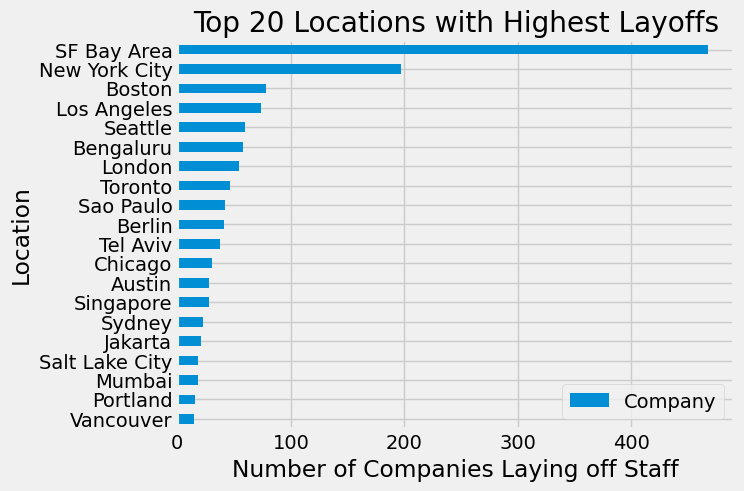

In [100]:
# customize this graph
top20_loc.plot.barh('Location', ylabel='Location', xlabel='Number of Companies Laying off Staff',
                    title='Top 20 Locations with Highest Layoffs')

San Francisco is the location with the highest layoffs. It is the location of Silicon Valley, the global tech capital.

Let us test the hypothesis that fintech companies based in San Francisco face the highest rates of layoffs.

In [101]:
# Companies in the Intersection of SF and Finance
layoffs.loc[(layoffs['Location'] == 'SF Bay Area') & (layoffs['Industry'] == 'Finance')]

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Doma,SF Bay Area,Finance,515.0,0.400,2022-12-06,https://investor.doma.com/node/8161/html,679.0,IPO,2022-12-07 06:21:36,United States,Unknown
4,Chipper Cash,SF Bay Area,Finance,50.0,0.125,2022-12-06,https://techcrunch.com/2022/12/06/african-fint...,302.0,Series C,2022-12-07 02:37:02,United States,Unknown
10,Zuora,SF Bay Area,Finance,NaN,0.110,2022-12-06,https://www.morningstar.com/news/marketwatch/2...,647.0,IPO,2022-12-07 06:26:48,United States,Unknown
200,Stripe,SF Bay Area,Finance,1000.0,0.140,2022-11-03,https://www.bloomberg.com/news/articles/2022-1...,2300.0,Series H,2022-11-03 14:49:15,United States,https://docs.google.com/spreadsheets/u/1/d/1aJ...
205,Affirm,SF Bay Area,Finance,NaN,0.010,2022-11-03,https://www.theinformation.com/briefings/e-com...,1500.0,IPO,2022-11-04 03:39:14,United States,Unknown
213,Chime,SF Bay Area,Finance,156.0,0.120,2022-11-02,https://www.theinformation.com/articles/chime-...,2300.0,Series G,2022-11-02 17:29:00,United States,Unknown
214,Chargebee,SF Bay Area,Finance,142.0,0.100,2022-11-02,https://techcrunch.com/2022/11/02/tiger-global...,468.0,Series H,2022-11-03 04:24:31,United States,Unknown
224,Upstart,SF Bay Area,Finance,140.0,0.070,2022-11-01,https://techcrunch.com/2022/11/01/upstart-layo...,144.0,IPO,2022-11-01 19:40:37,United States,Unknown
236,Equitybee,SF Bay Area,Finance,25.0,0.200,2022-10-31,https://www.calcalistech.com/ctechnews/article...,85.0,Series B,2022-10-31 15:30:11,United States,Unknown
249,GoFundMe,SF Bay Area,Finance,94.0,0.120,2022-10-26,https://www.gofundme.com/c/announcement,NaN,Series A,2022-10-26 23:13:47,United States,Unknown


There are only 59 companies fitting this narrative. We will explore further.

In [102]:
# Companies in the Intersection of New York City & Finance
layoffs.loc[(layoffs['Location'] == 'New York City') & (layoffs['Industry'] == 'Finance')]

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
5,Stash,New York City,Finance,32.0,0.08,2022-12-06,https://lp.stash.com/news/saying-goodbye-to-so...,480.0,Unknown,2022-12-07 02:38:29,United States,Unknown
93,Capitolis,New York City,Finance,37.0,0.25,2022-11-17,https://www.themarker.com/technation/2022-11-1...,281.0,Series D,2022-11-18 05:18:34,United States,Unknown
235,EquityZen,New York City,Finance,30.0,0.27,2022-10-31,https://www.axios.com/2022/10/31/scoop-layoffs...,11.0,Series B,2022-11-01 03:59:31,United States,Unknown
394,CommonBond,New York City,Finance,NaN,1.00,2022-09-09,https://www.linkedin.com/posts/daveklein_after...,125.0,Series D,2022-09-11 03:27:20,United States,Unknown
444,Argyle,New York City,Finance,20.0,0.07,2022-08-26,https://techcrunch.com/2022/08/26/fintech-argy...,78.0,Series B,2022-08-26 21:39:46,United States,Unknown
471,Petal,New York City,Finance,NaN,NaN,2022-08-18,Internal memo,704.0,Series D,2022-08-22 15:26:01,United States,Unknown
514,Melio,New York City,Finance,60.0,NaN,2022-08-09,https://www.calcalistech.com/ctechnews/article...,504.0,Series D,2022-08-09 18:30:37,United States,https://docs.google.com/spreadsheets/d/1pIzBYS...
520,DailyPay,New York City,Finance,NaN,0.15,2022-08-09,Internal memo,814.0,Unknown,2022-08-10 22:41:23,United States,Unknown
724,Thimble,New York City,Finance,20.0,0.33,2022-07-05,https://coverager.com/layoffs-at-thimble/,28.0,Series A,2022-07-06 04:35:01,United States,Unknown
743,Stash Financial,New York City,Finance,40.0,0.08,2022-06-30,https://www.forbes.com/sites/jeffkauflin/2022/...,480.0,Unknown,2022-10-26 04:31:47,United States,Unknown


In [103]:
# Companies in the Intersection of SF & Retail
layoffs.loc[(layoffs['Location'] == 'SF Bay Area') & (layoffs['Industry'] == 'Retail')]

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
46,Firework,SF Bay Area,Retail,NaN,0.10,2022-11-29,https://www.theinformation.com/articles/live-s...,269.0,Series B,2022-12-01 06:36:01,United States,Unknown
279,Faire,SF Bay Area,Retail,84.0,0.07,2022-10-18,https://www.theinformation.com/briefings/e-com...,1700.0,Series G,2022-11-04 03:40:25,United States,Unknown
516,Shogun,SF Bay Area,Retail,48.0,0.30,2022-08-09,Internal memo,114.0,Series C,2022-08-10 15:22:27,United States,Unknown
597,Allbirds,SF Bay Area,Retail,23.0,NaN,2022-07-28,Internal memo,202.0,IPO,2022-07-30 23:17:36,United States,Unknown
694,Spring,SF Bay Area,Retail,NaN,NaN,2022-07-12,https://www.businessinsider.com/merch-company-...,61.0,Unknown,2022-07-13 23:49:51,United States,Unknown
741,Enjoy,SF Bay Area,Retail,400.0,0.18,2022-06-30,https://news.crunchbase.com/public/bankruptcy-...,310.0,IPO,2022-06-30 21:43:20,United States,Unknown
766,Modsy,SF Bay Area,Retail,NaN,NaN,2022-06-29,https://techcrunch.com/2022/06/29/modsy-shuts-...,72.0,Series C,2022-07-01 04:21:49,United States,Unknown
875,Stitch Fix,SF Bay Area,Retail,330.0,0.15,2022-06-09,https://www.cnbc.com/2022/06/09/stitch-fix-is-...,79.0,IPO,2022-06-09 19:49:32,United States,Unknown
897,KiwiCo,SF Bay Area,Retail,40.0,NaN,2022-06-07,Internal memo,11.0,Unknown,2022-06-17 03:04:37,United States,Unknown
1044,Grove Collaborative,SF Bay Area,Retail,NaN,0.17,2022-03-19,https://www.retaildive.com/news/grove-collabor...,474.0,Series E,2022-03-30 15:13:21,United States,Unknown


From our comparison of the counts of the second-highest location with layoffs (New York City) and the second-highest industry facing layoffs (Retail), we see in fact that SF Fintech is the location-industry combination with the highest number of layoffs.

We'll now analyze the dataset to see which companies have had the most layoffs by employee count and percentage of employees

In [104]:
# Companies with the highest number of laid off employees by count
layoffs[['Company', 'Laid_Off_Count', 'Percentage']].sort_values(by='Laid_Off_Count', ascending=False)[:10]

,Company,Laid_Off_Count,Percentage
163,Meta,11000.0,0.13
100,Amazon,10000.0,0.03
1171,Booking.com,4375.0,0.25
101,Cisco,4100.0,0.05
193,Twitter,3700.0,0.50
1320,Uber,3700.0,0.14
1051,Better.com,3000.0,0.33
1275,Uber,3000.0,0.13
1064,Peloton,2800.0,0.20
1475,Groupon,2800.0,0.44


In [105]:
# Companies with the highest number of laid off employees by percentage
layoffs[['Company', 'Laid_Off_Count', 'Percentage']].sort_values(by='Percentage', ascending=False)[:100]

,Company,Laid_Off_Count,Percentage
850,JetClosing,NaN,1.0
1126,Rubica,NaN,1.0
161,Wavely,NaN,1.0
1112,Simple,NaN,1.0
1111,Aura Financial,NaN,1.0
...,...,...,...
1737,Popin,NaN,1.0
1742,Service,NaN,1.0
1741,Help.com,16.0,1.0
1733,Ejento,84.0,1.0


Meta & Amazon are the companies with the highest number of employees by count who have been laid off. However, none of the companies in the top 10 by laid off count are in the top 100 by percentage.

This may reflect the fact that smaller companies are closing shop and laying off all their workforce, which number is significantly smaller than the companies at the top of the laid off count column.

We will analyze this further when we consider the correlation between funding stage and layoffs.

Note that all the companies in the top 100 by percentage have laid off their entire employee base.

### Correlations in the Dataset

From our analysis, there are a number of rows with missing values in the laid off count and percentage columns.

We will drop these columns as we prepare for correlation analysis.

In [106]:
corr_layoffs = layoffs.loc[~(layoffs['Laid_Off_Count'].isnull()) & ~(layoffs['Percentage'].isnull()) & ~(layoffs['Funds_Raised'].isnull())]

corr_layoffs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 1745
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Company                     857 non-null    object        
 1   Location                    857 non-null    object        
 2   Industry                    857 non-null    object        
 3   Laid_Off_Count              857 non-null    float64       
 4   Percentage                  857 non-null    float64       
 5   Date                        857 non-null    datetime64[ns]
 6   Source                      857 non-null    object        
 7   Funds_Raised                857 non-null    float64       
 8   Stage                       857 non-null    object        
 9   Date_Added                  857 non-null    datetime64[ns]
 10  Country                     857 non-null    object        
 11  List_of_Employees_Laid_Off  857 non-null    object       

In [107]:
# Check for null values
corr_layoffs.isna().sum()

Company                       0
Location                      0
Industry                      0
Laid_Off_Count                0
Percentage                    0
Date                          0
Source                        0
Funds_Raised                  0
Stage                         0
Date_Added                    0
Country                       0
List_of_Employees_Laid_Off    0
dtype: int64

### Correlation between Location and Layoffs

In order to determine correlation, we will convert limit the dataset to the top 10 locations for layoffs and convert the locations into dummy values. Then apply the .corr() method on the dataset.

In [108]:
# Retain Top 10 locations
locs = corr_layoffs['Location'].value_counts()[:20]
locs_layoffs = corr_layoffs.loc[corr_layoffs['Location'].isin(locs.index)]
locs_layoffs.head()

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Doma,SF Bay Area,Finance,515.0,0.400,2022-12-06,https://investor.doma.com/node/8161/html,679.0,IPO,2022-12-07 06:21:36,United States,Unknown
1,BuzzFeed,New York City,Media,180.0,0.120,2022-12-06,https://variety.com/2022/digital/news/buzzfeed...,696.0,IPO,2022-12-06 18:40:43,United States,Unknown
4,Chipper Cash,SF Bay Area,Finance,50.0,0.125,2022-12-06,https://techcrunch.com/2022/12/06/african-fint...,302.0,Series C,2022-12-07 02:37:02,United States,Unknown
5,Stash,New York City,Finance,32.0,0.080,2022-12-06,https://lp.stash.com/news/saying-goodbye-to-so...,480.0,Unknown,2022-12-07 02:38:29,United States,Unknown
6,Perimeter 81,Tel Aviv,Security,20.0,0.080,2022-12-06,https://www.calcalistech.com/ctechnews/article...,165.0,Series C,2022-12-07 02:35:54,Israel,Unknown


Correlation analysis requires numerical variables. In order to conduct correlation analysis on categorical variables, we will convert them to numerical variables using dummy variables / one-hot encoding.

In [109]:
# Get dummies
locations = pd.get_dummies(locs_layoffs['Location'])
locations['Laid_Off_Count'] = locs_layoffs['Laid_Off_Count']

locations.head()

,Austin,Bengaluru,Berlin,Boston,Chicago,Gurugram,London,Los Angeles,Montreal,New Delhi,...,SF Bay Area,Salt Lake City,Sao Paulo,Seattle,Singapore,Sydney,Tel Aviv,Toronto,Vancouver,Laid_Off_Count
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,515.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,180.0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,50.0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32.0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,20.0


In [110]:
loc_corr = locations.corr()['Laid_Off_Count'][:-1]
loc_corr

Austin           -0.028151
Bengaluru         0.053266
Berlin           -0.034416
Boston           -0.025202
Chicago           0.008843
Gurugram          0.031388
London           -0.020540
Los Angeles      -0.029820
Montreal         -0.019642
New Delhi        -0.014152
New York City    -0.022881
SF Bay Area       0.075138
Salt Lake City   -0.019829
Sao Paulo        -0.024115
Seattle           0.082054
Singapore         0.004368
Sydney           -0.025898
Tel Aviv         -0.046330
Toronto          -0.054219
Vancouver        -0.023079
Name: Laid_Off_Count, dtype: float64

Text(0.5, 1.0, 'Correlation of Location with Layoffs')

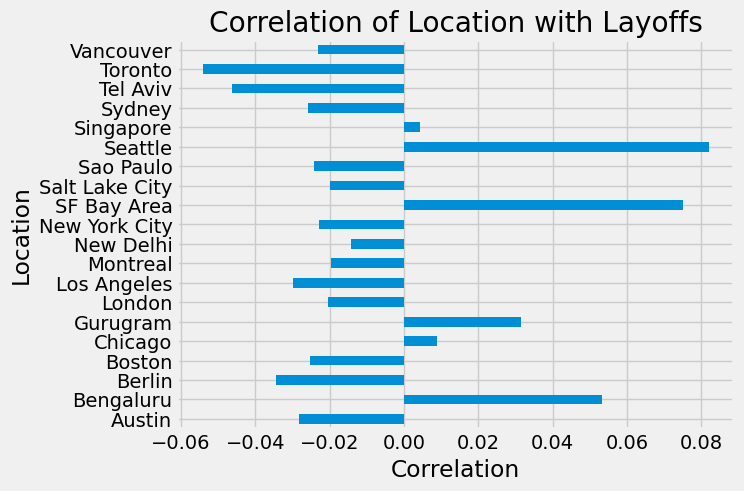

In [111]:
# Plot showing correlation between Location & Layoffs
loc_corr.plot.barh()
plt.ylabel('Location')
plt.xlabel('Correlation')
plt.title('Correlation of Location with Layoffs')

From the plot, Seattle has the highest positive correlation with layoffs. However, most of the top 10 locations are negatively correlated with layoffs.

The correlation plot shows a slightly different picture from the frequency plot. Many of locations with the highest frequency are not as likely to be positively correlated with layoffs.

### Correlation between Funds Raised and Layoffs

Text(0.5, 1.0, 'Boxplot Showing Frequency Distribution of Funds Raised')

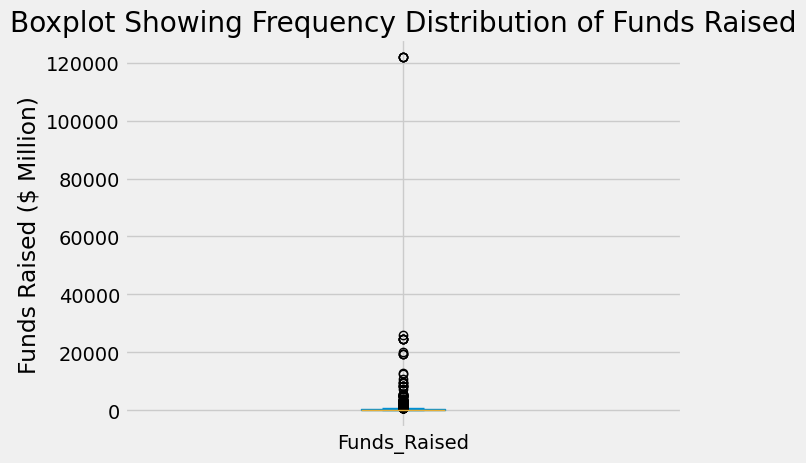

In [112]:
# Let's see the spread of funds raised box plot.
layoffs['Funds_Raised'].plot.box()
plt.ylabel('Funds Raised ($ Million)')
plt.title('Boxplot Showing Frequency Distribution of Funds Raised')

Funds raised spread is very slim.

Text(0.5, 1.0, 'Histogram Showing Frequency Distribution of Funds Raised')

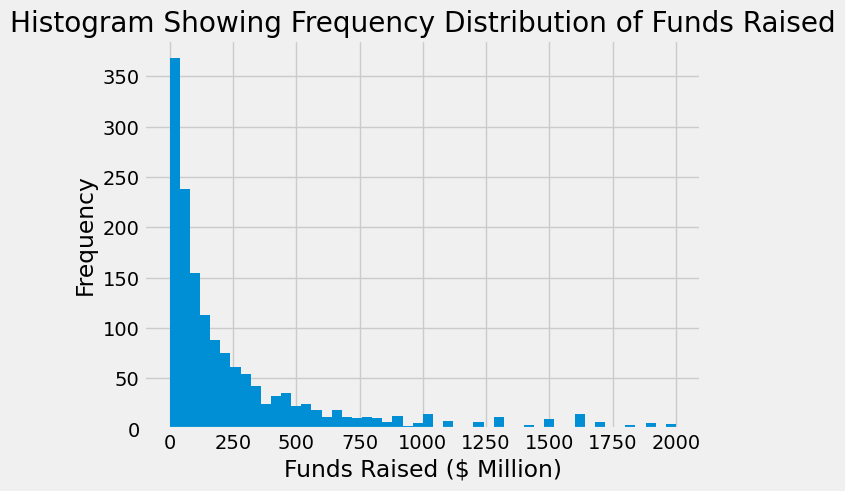

In [113]:
# Plot Histogram to see frequency of amounts raised. Exclude Raises in Excess of USD2 billion.
layoffs['Funds_Raised'].plot.hist(bins=50, range=(0,2000))
plt.xlabel('Funds Raised ($ Million)')
plt.title('Histogram Showing Frequency Distribution of Funds Raised')

In [114]:
# Correlation between funds raised and number of employees laid off
corr_layoffs = layoffs.loc[~(layoffs['Laid_Off_Count'].isnull()) & ~(layoffs['Percentage'].isnull()) & ~(layoffs['Funds_Raised'].isnull())]

corr_layoffs[['Funds_Raised', 'Laid_Off_Count']].corr()['Laid_Off_Count'][0]

0.16796245058240414

There is a slight positive correlation between funds raised and layoffs. We'll view it on a scatter plot.

<AxesSubplot: title={'center': 'Correlation between Funds Raised and Layoffs'}, xlabel='Funds_Raised', ylabel='Laid_Off_Count'>

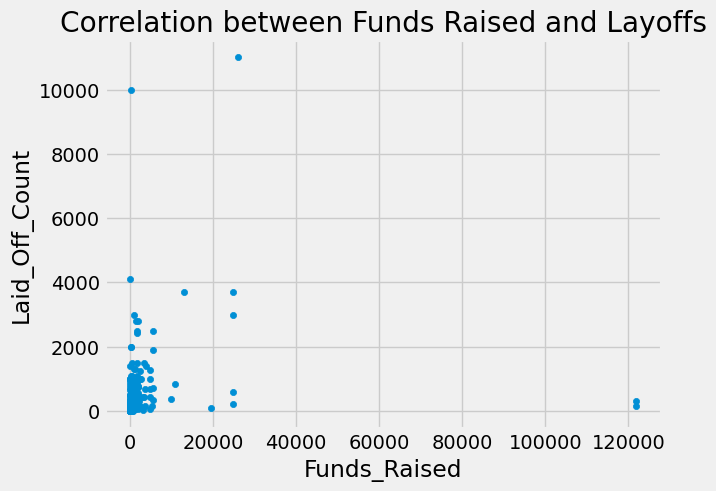

In [115]:
corr_layoffs.plot.scatter(x='Funds_Raised', y='Laid_Off_Count', title='Correlation between Funds Raised and Layoffs')

The charts tell a slightly wider story. Companies who have raised below USD2 billion are less likely to have laid off staff. This may reflect the general dataset where most companies facing layoffs have raised under USD2 billion.

The outlier is the USD100 billion company, Netflix. From the table below, Netflix has laid off about 4% of its staff in two rounds of layoffs this year.

In [116]:
corr_layoffs[corr_layoffs['Funds_Raised'] == corr_layoffs['Funds_Raised'].max()]

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
793,Netflix,SF Bay Area,Media,300.0,0.03,2022-06-23,https://www.cnbc.com/2022/06/23/netflix-lays-o...,121900.0,IPO,2022-06-23 19:35:36,United States,Unknown
979,Netflix,SF Bay Area,Media,150.0,0.01,2022-05-17,https://www.cnbc.com/2022/05/17/netflix-lays-o...,121900.0,IPO,2022-05-17 18:58:36,United States,Unknown


We'll calculate and chart the relationship between funds raised and percentage of employees laid off.

In [117]:
# Correlation between Funds Raised and Percentage of Employees laid off
corr_layoffs[['Funds_Raised', 'Percentage']].corr()['Percentage'][0]

-0.07077338847387127

There is a slight negative correlation between funds raised and percentage of employees laid off.

<AxesSubplot: title={'center': 'Correlation between Funds Raised and %Layoffs'}, xlabel='Funds Raised ($M)', ylabel='Percentage of Employees Laid Off'>

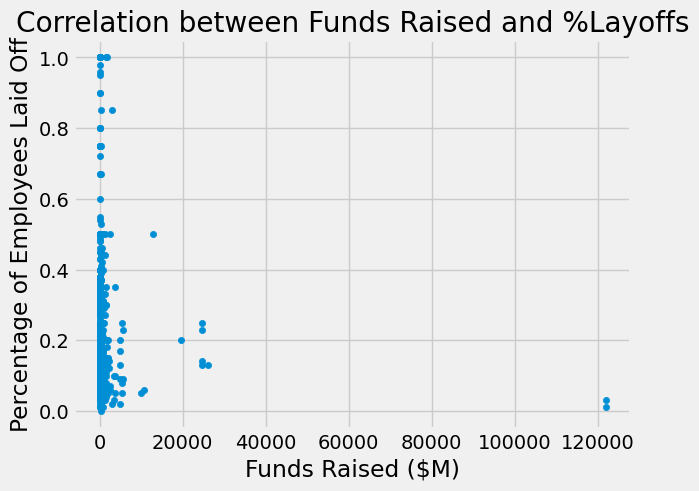

In [118]:
corr_layoffs.plot.scatter(x='Funds_Raised', y='Percentage', title='Correlation between Funds Raised and %Layoffs', xlabel='Funds Raised ($M)', ylabel='Percentage of Employees Laid Off')

The scatter plot corroborates the earlier statement that there is a slight negative correlation between funds raised and layoffs.

This means that the lower the funds raised, the higher the likelihood that a higher number of employees were laid off. We will analyze this further in funding stage correlation.

In [119]:
# Correlation between Funding Stage and Layoffs
# Drop Unknown Rows
fund_stage = layoffs['Stage'].value_counts().reset_index().rename(columns={'index':'Funding_Stage', 'Stage':'Num_of_Companies'})[1:]
fund_stage = fund_stage.sort_values('Num_of_Companies')
fund_stage

,Funding_Stage,Num_of_Companies
14,Series I,5
13,Series J,7
12,Series G,12
11,Series H,20
10,Private Equity,29
9,Series F,43
8,Seed,58
7,Series E,92
6,Acquired,118
5,Series A,145


Text(0.5, 1.0, 'Frequency of Funding Stages in Layoffs')

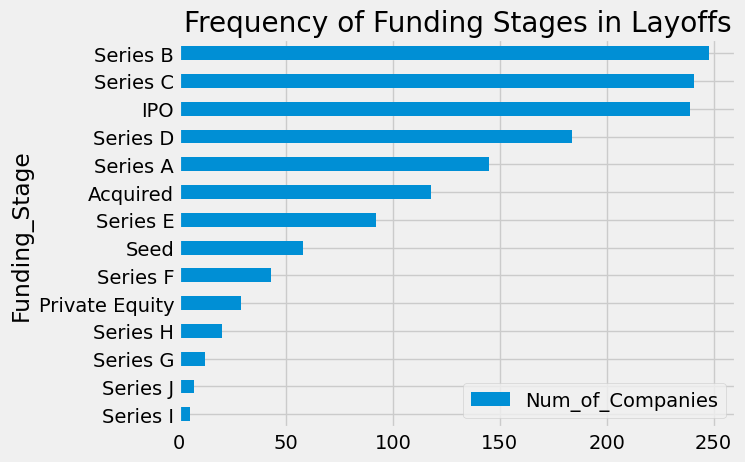

In [138]:
fund_stage.plot.barh(x='Funding_Stage', y='Num_of_Companies')
plt.title('Frequency of Funding Stages in Layoffs')

From the chart above, we see that the top 5 stages represented in the dataset are the first 4 series of funding and the IPO stage.

Let's calculate correlation between fund stage and percentage of laid off employees.

In [122]:
# Get dummies
fund_df = pd.get_dummies(corr_layoffs['Stage']).iloc[:,:-1]
fund_df['Percentage'] = corr_layoffs['Percentage']

fund_df.head()

,Acquired,IPO,Private Equity,Seed,Series A,Series B,Series C,Series D,Series E,Series F,Series G,Series H,Series I,Series J,Percentage
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.400
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.120
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.125
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.080
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.080


In [123]:
stage_corr = fund_df.corr()['Percentage'][:-1]
stage_corr

Acquired          0.104799
IPO              -0.150741
Private Equity   -0.054073
Seed              0.268226
Series A          0.114699
Series B          0.124912
Series C         -0.033797
Series D         -0.091497
Series E         -0.077432
Series F         -0.066350
Series G         -0.029363
Series H         -0.063889
Series I         -0.047920
Series J         -0.029886
Name: Percentage, dtype: float64

Text(0.5, 1.0, 'Correlation of Funding Stage with Layoffs')

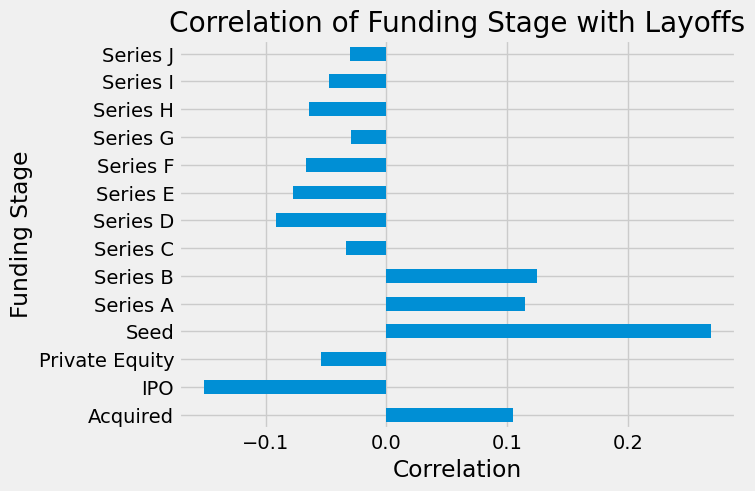

In [139]:
# Redesign this plot
stage_corr.plot.barh()
plt.ylabel('Funding Stage')
plt.xlabel('Correlation')
plt.title('Correlation of Funding Stage with Layoffs')

The correlation chart shows a slightly different picture. Companies in seed stage are more likely than other stages to be laying off staff.

### Correlation between Industry and Layoffs

In [125]:
# Retain top 15 Industries
inds = corr_layoffs['Industry'].value_counts()[:20]
ind_layoffs = corr_layoffs.loc[corr_layoffs['Industry'].isin(inds.index)]
ind_layoffs.head()

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Doma,SF Bay Area,Finance,515.0,0.400,2022-12-06,https://investor.doma.com/node/8161/html,679.0,IPO,2022-12-07 06:21:36,United States,Unknown
1,BuzzFeed,New York City,Media,180.0,0.120,2022-12-06,https://variety.com/2022/digital/news/buzzfeed...,696.0,IPO,2022-12-06 18:40:43,United States,Unknown
4,Chipper Cash,SF Bay Area,Finance,50.0,0.125,2022-12-06,https://techcrunch.com/2022/12/06/african-fint...,302.0,Series C,2022-12-07 02:37:02,United States,Unknown
5,Stash,New York City,Finance,32.0,0.080,2022-12-06,https://lp.stash.com/news/saying-goodbye-to-so...,480.0,Unknown,2022-12-07 02:38:29,United States,Unknown
6,Perimeter 81,Tel Aviv,Security,20.0,0.080,2022-12-06,https://www.calcalistech.com/ctechnews/article...,165.0,Series C,2022-12-07 02:35:54,Israel,Unknown


In [126]:
# Correlation between Industry & Layoffs
ind_df = pd.get_dummies(ind_layoffs['Industry']).iloc[:,:-1]
ind_df['Laid_Off_Count'] = ind_layoffs['Laid_Off_Count']

ind_corr = ind_df.corr()['Laid_Off_Count'][:-1]
ind_corr

Consumer          0.131039
Crypto           -0.000525
Data             -0.040863
Education        -0.006488
Finance          -0.060102
Fitness           0.071002
Food              0.012547
HR               -0.045265
Healthcare       -0.039219
Logistics        -0.024923
Marketing        -0.063493
Media            -0.040665
Other            -0.024167
Real Estate       0.025474
Recruiting       -0.017358
Retail            0.062367
Security         -0.031739
Support          -0.027030
Transportation    0.095977
Name: Laid_Off_Count, dtype: float64

Text(0.5, 1.0, 'Correlation of Industry with Layoffs')

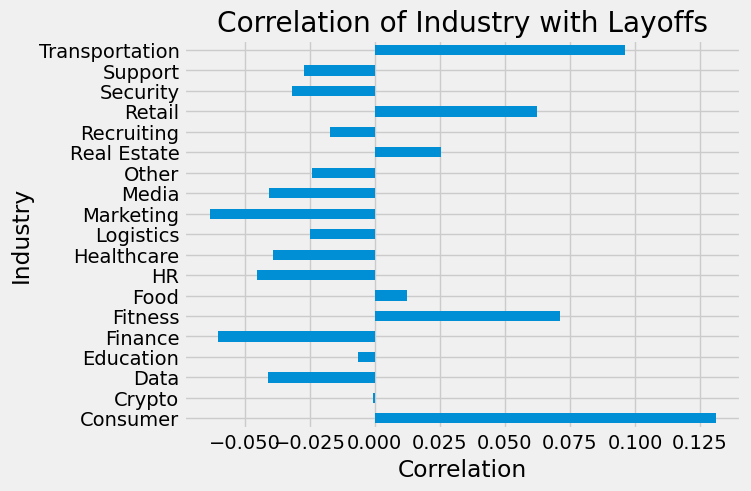

In [140]:
ind_corr.plot.barh()
plt.ylabel('Industry')
plt.xlabel('Correlation')
plt.title('Correlation of Industry with Layoffs')

While Fintech was the industry with the highest number of laid off employees, the industry with the highest correlation to layoffs is the consumer industry.

Fintech, however, has a slight negative correlation to layoffs.

### Charting Layoff Timelines
We will now consider how the frequency of layoffs occurred overtime. We will drop the empty row in the date coloumn,

In [128]:
# Clean date column
date_df = layoffs[['Date', 'Laid_Off_Count', 'Percentage']].loc[~layoffs['Date'].isnull()]
date_df = date_df.sort_values(by='Date')

date_df.head()

,Date,Laid_Off_Count,Percentage
1746,2020-03-11,75.0,NaN
1745,2020-03-12,20.0,0.40
1743,2020-03-13,8.0,0.10
1744,2020-03-13,6.0,0.75
1742,2020-03-16,NaN,1.00


In [129]:
# Create a Month, Year Column
date_df['Month'] = date_df['Date'].dt.strftime('%Y-%m')
date_df.head()

,Date,Laid_Off_Count,Percentage,Month
1746,2020-03-11,75.0,NaN,2020-03
1745,2020-03-12,20.0,0.40,2020-03
1743,2020-03-13,8.0,0.10,2020-03
1744,2020-03-13,6.0,0.75,2020-03
1742,2020-03-16,NaN,1.00,2020-03


In [130]:
date_df = date_df.groupby('Month').agg({'Laid_Off_Count':np.sum}).reset_index()
date_df

,Month,Laid_Off_Count
0,2020-03,9628.0
1,2020-04,26710.0
2,2020-05,25804.0
3,2020-06,7627.0
4,2020-07,7112.0
5,2020-08,1969.0
6,2020-09,609.0
7,2020-10,450.0
8,2020-11,207.0
9,2020-12,852.0


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '2022-08'),
  Text(0.0, 0, '2020-03'),
  Text(5.0, 0, '2020-08'),
  Text(10.0, 0, '2021-01'),
  Text(15.0, 0, '2021-06'),
  Text(20.0, 0, '2021-11'),
  Text(25.0, 0, '2022-04'),
  Text(30.0, 0, '2022-09'),
  Text(35.0, 0, '')])

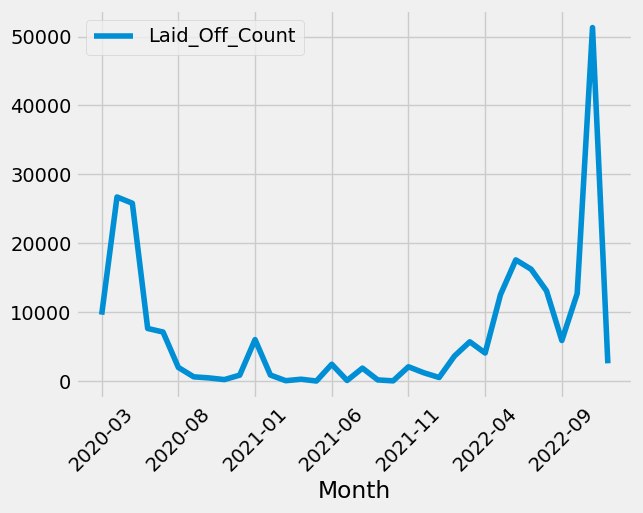

In [131]:
# Line Plot showing frequency of layoffs over time.
date_df.plot(x='Month', y='Laid_Off_Count')
plt.xticks(rotation=45)

From the general layoffs table, we see a spike in layoffs at the beginning of the dataset in March 2020. This was as a result of the pandemic. This spike drops significantly by August 2020 and remains reduced until we see a spike in April 2022.

We also see that there is a significant spike in 2022, which we know is a result of recessionary sentiments. We'll plot the layoffs for the year 2022

In [132]:
# Seperate the 2022 data from the rest of the dataset
date_df = layoffs[['Date', 'Laid_Off_Count', 'Percentage']].loc[~layoffs['Date'].isnull()]
date_df = date_df.sort_values(by='Date')
date_2022 = date_df.loc[date_df['Date'] >= '2022-01-01']
date_2022['Month'] = date_2022['Date'].dt.strftime('%Y-%m')
date_2022 = date_2022.groupby('Month').agg({'Laid_Off_Count':np.sum}).reset_index()

date_2022

,Month,Laid_Off_Count
0,2022-01,510.0
1,2022-02,3625.0
2,2022-03,5694.0
3,2022-04,4064.0
4,2022-05,12535.0
5,2022-06,17584.0
6,2022-07,16223.0
7,2022-08,13095.0
8,2022-09,5881.0
9,2022-10,12683.0


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '2022-11'),
  Text(0.0, 0, '2022-01'),
  Text(2.0, 0, '2022-03'),
  Text(4.0, 0, '2022-05'),
  Text(6.0, 0, '2022-07'),
  Text(8.0, 0, '2022-09'),
  Text(10.0, 0, '2022-11'),
  Text(12.0, 0, '')])

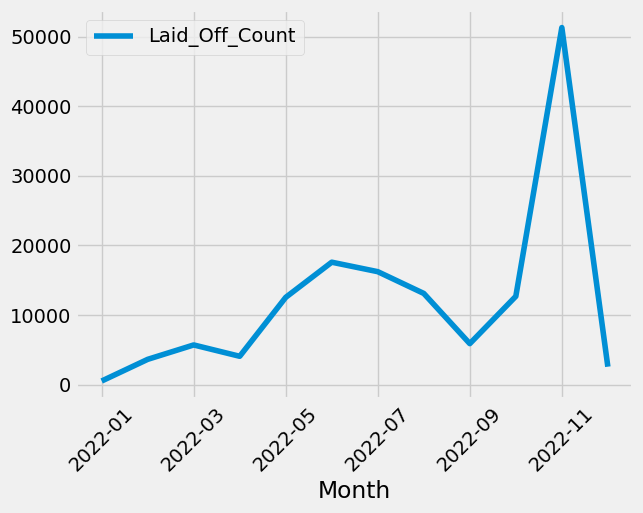

In [133]:
# Line Plot Showing Frequency of Layoffs in 2022
date_2022.plot(x='Month', y='Laid_Off_Count')
plt.xticks(rotation=45)

### Explanatory Visualization
Our statistical analysis has highlighted a number of insights into the dataset:
1. Frequency and correlation are not necessarily equal.
2. There is a marked increased in layoffs from the spring of 2022.
3. Location, Industry and Funding Stage are only slightly correlated with layoffs.

We will plot these insights using explanatory visualization.

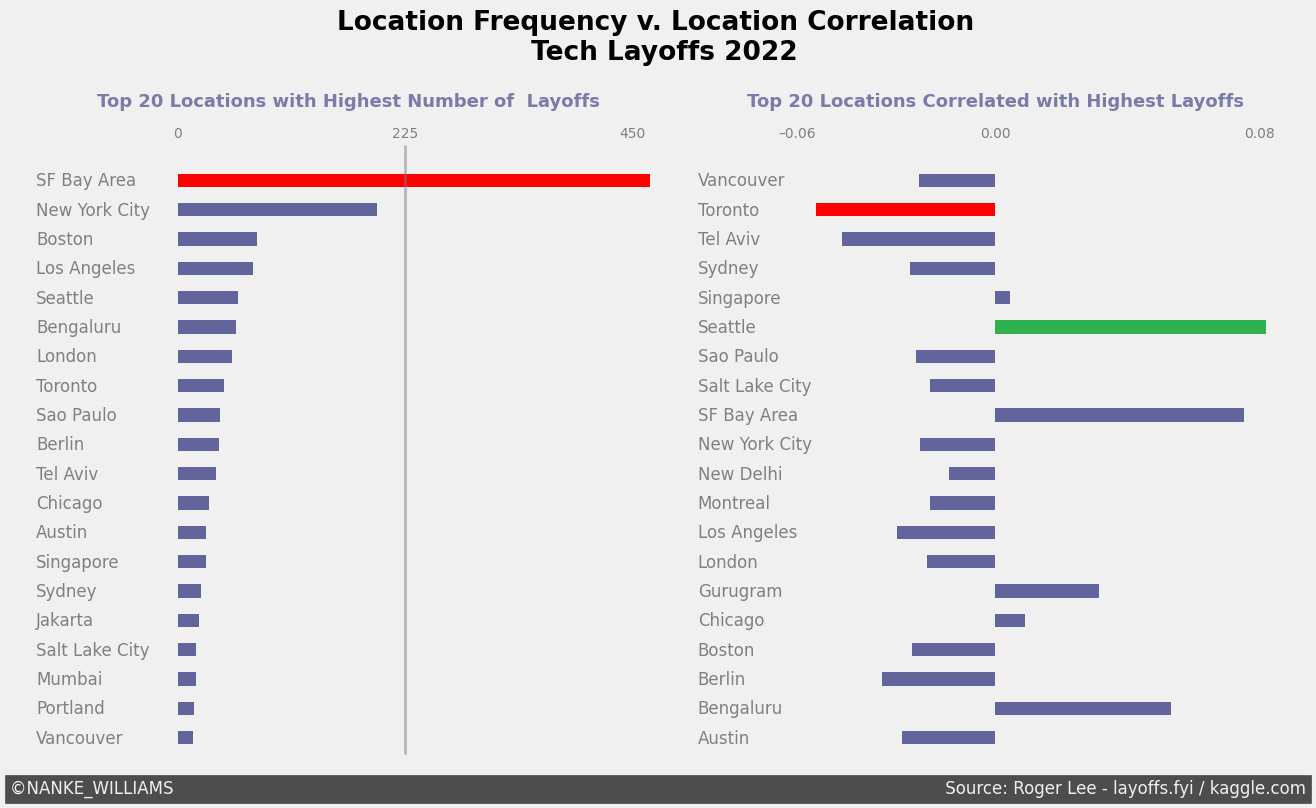

In [134]:
# Explanatory Viz - Location Frequency v. Location Correlation
style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

axes = [ax1, ax2]
for ax in axes:
    ax.spines[['left', 'right', 'bottom', 'top']].set_visible(False)
    ax.tick_params(left=False, bottom=False, top=False)
    ax.grid(visible=False)
    ax.xaxis.tick_top()
    ax.tick_params(axis='both', colors='grey')

# Location Frequency Plot
ax1.barh(top20_loc['Location'], top20_loc['Company'], color='#030764', height=0.45, alpha=0.6)
ax1.set_xticks([0, 225, 450])
ax1.set_xticklabels(['0', '225', '450'], size=10)
ax1.set_yticklabels([])
location_names = top20_loc['Location']
num=-0.2
for i, location in zip(range(20), location_names):
    ax1.text(x=-140, y=num, s=location, size=12, color='grey')
    num += 1
sf_loc = top20_loc.loc[top20_loc['Location'] == 'SF Bay Area']
ax1.barh(sf_loc['Location'], sf_loc['Company'], color='#FF0000', height=0.45)
ax1.axvline(x=225, ymin=0.03, c='grey', alpha=0.5, linewidth=2)
ax1.text(x=-80, y=21.5, s='Top 20 Locations with Highest Number of  Layoffs',
         size=13, weight='bold', color='#030764', alpha=0.5)

# Location Correlation Plot
ax2.barh(loc_corr.index, loc_corr, color='#030764', left=2, height=0.45, alpha=0.6)
ax2.set_xticks([1.94, 2.0, 2.08])
ax2.set_xticklabels(['–0.06', '0.00', '0.08'], size=10)
ax2.set_yticklabels([])
location_names1 = loc_corr.index
num=-0.2
for i, location in zip(range(20), location_names1):
    ax2.text(x=1.91, y=num, s=location, size=12, color='grey')
    num += 1
seattle_loc = loc_corr.loc[loc_corr.index == 'Seattle']
ax2.barh(seattle_loc.index, seattle_loc, color='#00FF00', left=2, height=0.45, alpha=0.5)
toronto_loc = loc_corr.loc[loc_corr.index == 'Toronto']
ax2.barh(toronto_loc.index, toronto_loc, color='#FF0000', left=2, height=0.45)
ax2.text(x=1.925, y=21.5, s='Top 20 Locations Correlated with Highest Layoffs',
         size=13, weight='bold', color='#030764', alpha=0.5)

# Title, Subtitle, Footer
fig.suptitle('Location Frequency v. Location Correlation \n Tech Layoffs 2022',
             size=19, weight='bold')
fig.text(0, 0, '©NANKE_WILLIAMS' + ' '*147 + 'Source: Roger Lee - layoffs.fyi / kaggle.com',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=12)

fig.tight_layout()
plt.show()

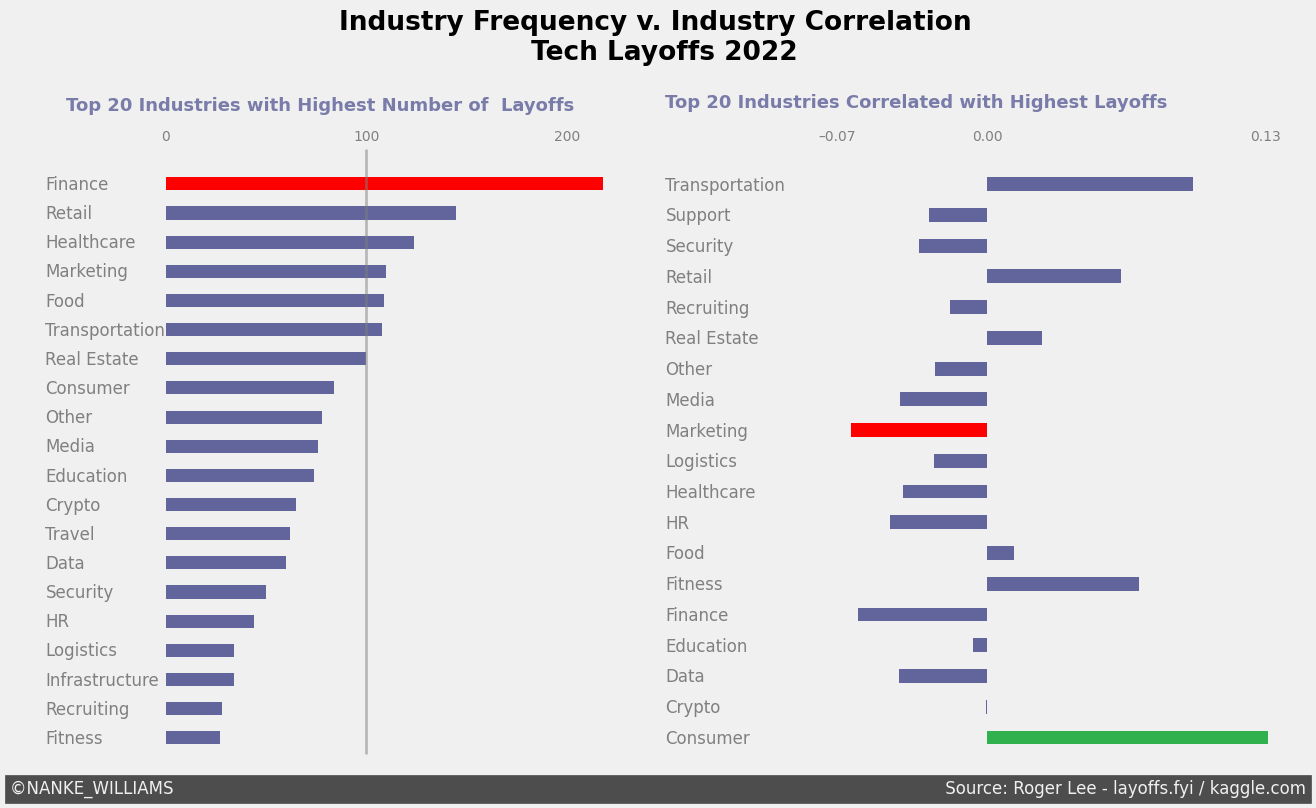

In [135]:
# Explanatory Viz - Industry Frequency v. Industry Correlation
style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

axes = [ax1, ax2]
for ax in axes:
    ax.spines[['left', 'right', 'bottom', 'top']].set_visible(False)
    ax.tick_params(left=False, bottom=False, top=False)
    ax.grid(visible=False)
    ax.xaxis.tick_top()
    ax.tick_params(axis='both', colors='grey')

# Industry Frequency Plot
ax1.barh(top20_ind['Industry'], top20_ind['Company'], color='#030764', height=0.45, alpha=0.6)
ax1.set_xticks([0, 100, 200])
ax1.set_xticklabels(['0', '100', '200'], size=10)
ax1.set_yticklabels([])
ind_names = top20_ind['Industry']
num=-0.2
for i, industry in zip(range(20), ind_names):
    ax1.text(x=-60, y=num, s=industry, size=12, color='grey')
    num += 1
finance = top20_ind.loc[top20_ind['Industry'] == 'Finance']
ax1.barh(finance['Industry'], finance['Company'], color='#FF0000', height=0.45)
ax1.axvline(x=100, ymin=0.03, c='grey', alpha=0.5, linewidth=2)
ax1.text(x=-50, y=21.5, s='Top 20 Industries with Highest Number of  Layoffs',
         size=13, weight='bold', color='#030764', alpha=0.5)

# Industry Correlation Plot
ax2.barh(ind_corr.index, ind_corr, color='#030764', left=2, height=0.45, alpha=0.6)
ax2.set_xticks([1.93, 2.0, 2.13])
ax2.set_xticklabels(['–0.07', '0.00', '0.13'], size=10)
ax2.set_yticklabels([])
ind_names1 = ind_corr.index
num=-0.2
for i, industry in zip(range(20), ind_names1):
    ax2.text(x=1.85, y=num, s=industry, size=12, color='grey')
    num += 1
consumer = ind_corr.loc[ind_corr.index == 'Consumer']
ax2.barh(consumer.index, consumer, color='#00FF00', left=2, height=0.45, alpha=0.5)
marketing = ind_corr.loc[ind_corr.index == 'Marketing']
ax2.barh(marketing.index, marketing, color='#FF0000', left=2, height=0.45)
ax2.text(x=1.85, y=20.5, s='Top 20 Industries Correlated with Highest Layoffs',
         size=13, weight='bold', color='#030764', alpha=0.5)

# Title, Subtitle, Footer
fig.suptitle('Industry Frequency v. Industry Correlation \n Tech Layoffs 2022',
             size=19, weight='bold')
fig.text(0, 0, '©NANKE_WILLIAMS' + ' '*147 + 'Source: Roger Lee - layoffs.fyi / kaggle.com',
         color = '#f0f0f0', backgroundcolor = '#4d4d4d',
         size=12)

fig.tight_layout()
plt.show()

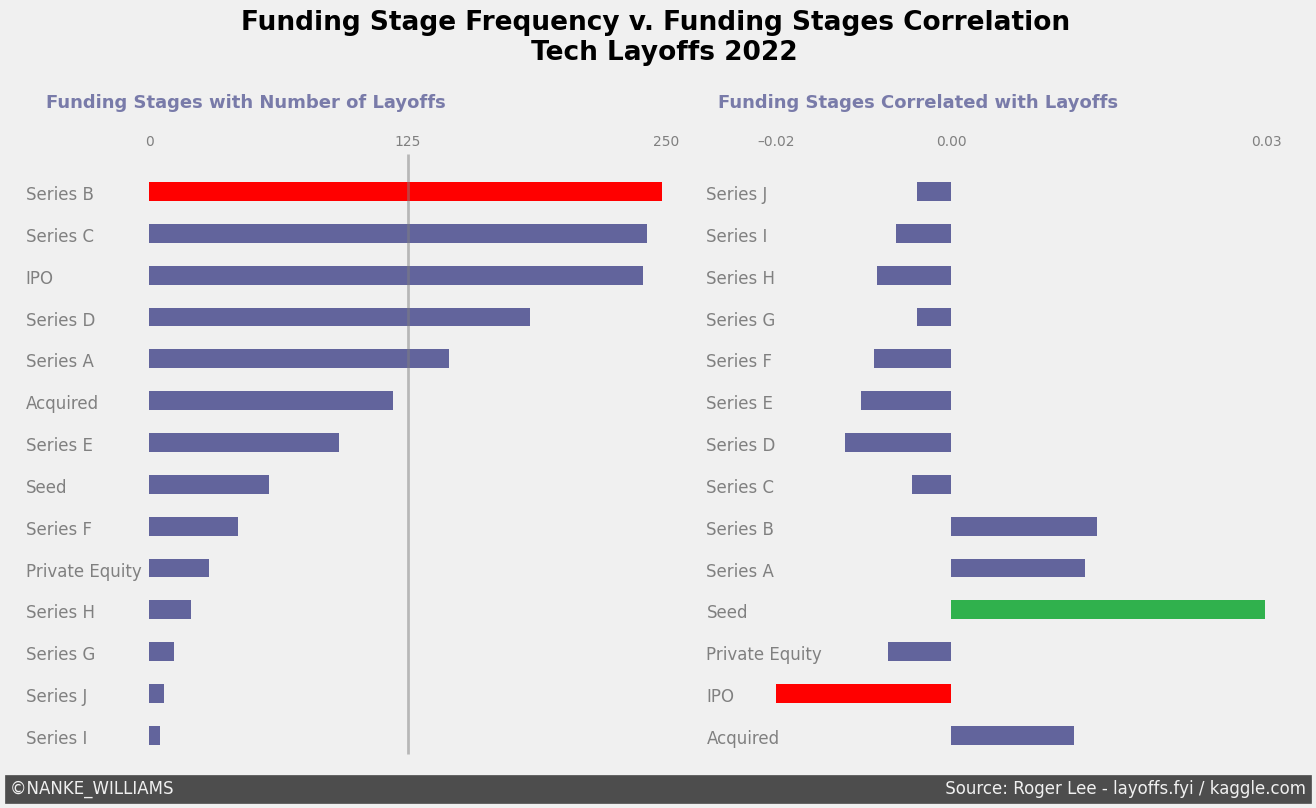

In [136]:
# Explanatory Viz - Fund Stage Frequency v. Fund Stage Correlation
style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

axes = [ax1, ax2]
for ax in axes:
    ax.spines[['left', 'right', 'bottom', 'top']].set_visible(False)
    ax.tick_params(left=False, bottom=False, top=False)
    ax.grid(visible=False)
    ax.xaxis.tick_top()
    ax.tick_params(axis='both', colors='grey')

# Fund Stage Frequency Plot
ax1.barh(fund_stage['Funding_Stage'], fund_stage['Num_of_Companies'], color='#030764', height=0.45, alpha=0.6)
ax1.set_xticks([0, 125, 250])
ax1.set_xticklabels(['0', '125', '250'], size=10)
ax1.set_yticklabels([])
stage_names = fund_stage['Funding_Stage']
num=-0.2
for i, stage in zip(range(20), stage_names):
    ax1.text(x=-60, y=num, s=stage, size=12, color='grey')
    num += 1
series_b = fund_stage.loc[fund_stage['Funding_Stage'] == 'Series B']
ax1.barh(series_b['Funding_Stage'], series_b['Num_of_Companies'], color='#FF0000', height=0.45)
ax1.axvline(x=125, ymin=0.03, c='grey', alpha=0.5, linewidth=2)
ax1.text(x=-50, y=15, s='Funding Stages with Number of Layoffs',
         size=13, weight='bold', color='#030764', alpha=0.5)

#  Fund Stage Correlation Plot
ax2.barh(stage_corr.index, stage_corr, color='#030764', left=2, height=0.45, alpha=0.6)
ax2.set_xticks([1.85, 2.0, 2.27])
ax2.set_xticklabels(['–0.02', '0.00', '0.03'], size=10)
ax2.set_yticklabels([])
stage_names1 = stage_corr.index
num=-0.2
for i, stage in zip(range(20), stage_names1):
    ax2.text(x=1.79, y=num, s=stage, size=12, color='grey')
    num += 1
seed = stage_corr.loc[stage_corr.index == 'Seed']
ax2.barh(seed.index, seed, color='#00FF00', left=2, height=0.45, alpha=0.5)
ipo = stage_corr.loc[stage_corr.index == 'IPO']
ax2.barh(ipo.index, ipo, color='#FF0000', left=2, height=0.45)
ax2.text(x=1.8, y=15, s='Funding Stages Correlated with Layoffs',
         size=13, weight='bold', color='#030764', alpha=0.5)

# Title, Subtitle, Footer
fig.suptitle('Funding Stage Frequency v. Funding Stages Correlation \n Tech Layoffs 2022',
             size=19, weight='bold')
fig.text(0, 0, '©NANKE_WILLIAMS' + ' '*147 + 'Source: Roger Lee - layoffs.fyi / kaggle.com',
         color = '#f0f0f0', backgroundcolor = '#4d4d4d',
         size=12)

fig.tight_layout()
plt.show()

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '2022-11'),
  Text(0.0, 0, '2022-01'),
  Text(2.0, 0, '2022-03'),
  Text(4.0, 0, '2022-05'),
  Text(6.0, 0, '2022-07'),
  Text(8.0, 0, '2022-09'),
  Text(10.0, 0, '2022-11'),
  Text(12.0, 0, '')])

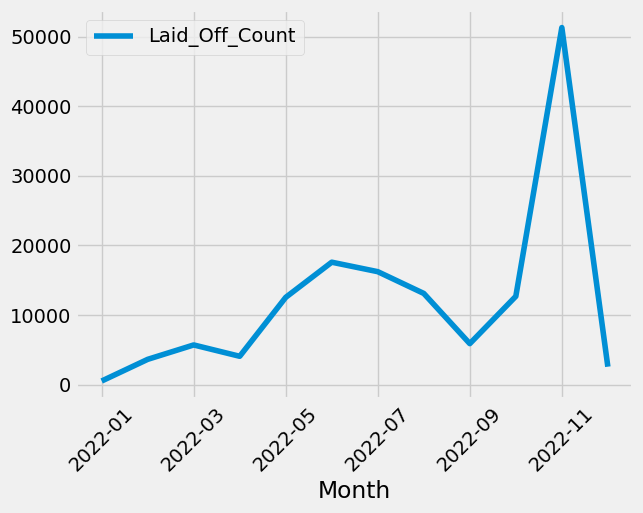

In [137]:
date_2022.plot(x='Month', y='Laid_Off_Count')
plt.xticks(rotation=45)